In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import tensorflow as tf
import numpy as np
import os

# plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [0]:
train = '/content/drive/My Drive/gesture_images/train' 
train = os.listdir(train)

In [0]:
test = '/content/drive/My Drive/gesture_images/test' 
test = os.listdir(test)

In [0]:
nbatch=128
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=12,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 zoom_range=0.15,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory('/content/drive/My Drive/gesture_images/train',
                                            target_size=(256,256),
                                            color_mode='grayscale',
                                            batch_size=nbatch,
                                            classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
                                            class_mode='categorical')

validation_gen=test_datagen.flow_from_directory('/content/drive/My Drive/gesture_images/validation',
                                            target_size=(256,256),
                                            color_mode='grayscale',
                                            batch_size=nbatch,
                                            classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
                                            class_mode='categorical')

test_gen=test_datagen.flow_from_directory('/content/drive/My Drive/gesture_images/test',
                                            target_size=(256,256),
                                            color_mode='grayscale',
                                            batch_size=nbatch,
                                            classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
                                            class_mode='categorical')






Found 9091 images belonging to 6 classes.
Found 0 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.


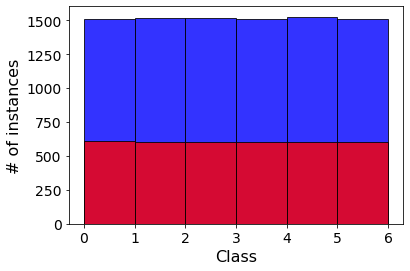

In [0]:
h1,_,_ = plt.hist(train_gen.classes, bins=range(0,7), alpha=0.8, color='blue', edgecolor='black')
h2,_,_ = plt.hist(test_gen.classes,  bins=range(0,7), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class');

In [0]:
train_gen.class_indices == test_gen.class_indices

True

**Display Image**

(128, 256, 256, 1) (128, 6)


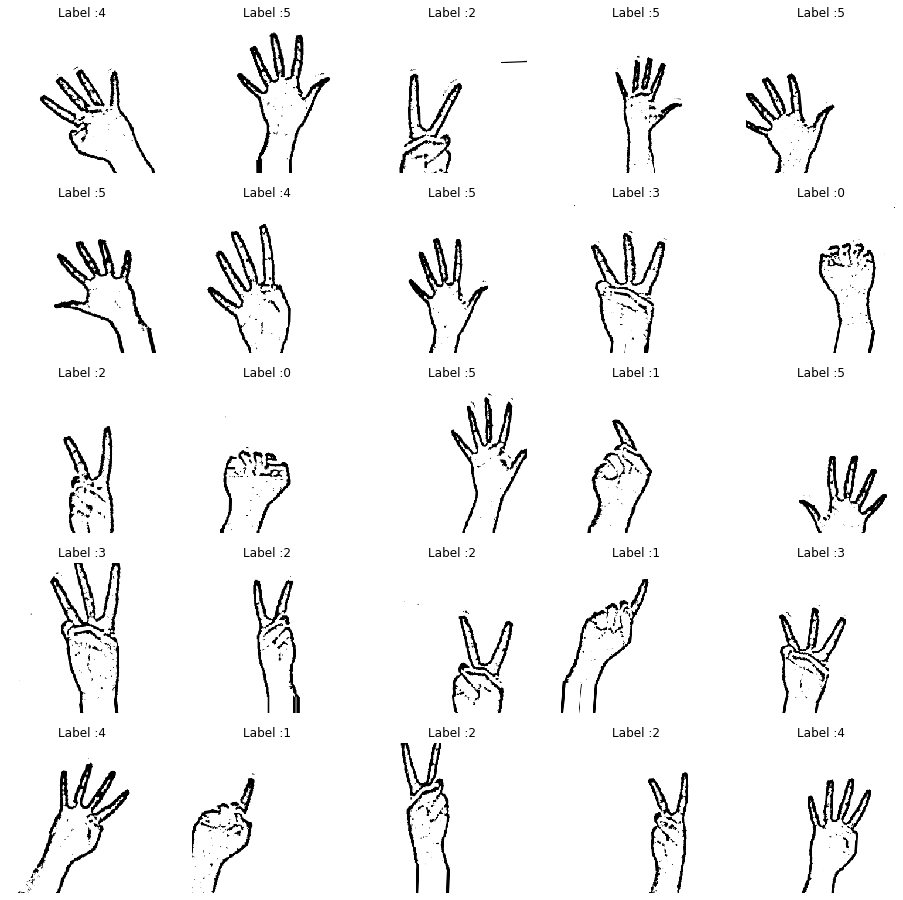

In [0]:
for X,y in train_gen:
  print(X.shape,y.shape)

  plt.figure(figsize=(16,16))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.title('Label :%d'% np.argmax(y[i]))
    img=np.uint8(255*X[i,:,:,0])
    plt.imshow(img,cmap='gray')
  break


In [0]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(150,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 123, 123, 64)      36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 121, 121, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 60, 60, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 58, 58, 256)      

In [0]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['acc'])

In [0]:


callbacks_list = [EarlyStopping(monitor='val_loss', patience=10),ModelCheckpoint(filepath='model_6cat.h5', monitor='val_loss', save_best_only=True)]



In [0]:
 history = model.fit_generator(
     train_gen,
     steps_per_epoch=71,
     epochs=10,
     validation_data=test_gen,
     validation_steps=28,
     callbacks=callbacks_list)

Epoch 1/10
 1/71 [..............................] - ETA: 3:08 - loss: 1.7711 - acc: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


70/71 [============================>.] - ETA: 38s - loss: 1.7744 - acc: 0.1960 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 18 could not be retrieved. It could b

71/71 [==============================] - 3872s 55s/step - loss: 1.7746 - acc: 0.1952 - val_loss: 1.7909 - val_acc: 0.1671
Epoch 2/10
 1/71 [..............................] - ETA: 41:27 - loss: 1.7912 - acc: 0.1797

In [0]:
#history=model.fit_generator(train_gen,epochs=5,validation_data=test_gen,validation_steps=28,callbacks=callback_list)

In [0]:


plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['acc'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')



Testing Accuracy=16.73%


In [0]:
test_datagen  = ImageDataGenerator( rescale=1./255, 
                                    rotation_range=10.,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                  )

test_gen = test_datagen.flow_from_directory(
        'images/test/',
        target_size=(300, 300),
        color_mode='grayscale',
        batch_size=nbatch,
        classes=['NONE','ONE','TWO','THREE','FOUR','FIVE'],
        class_mode='categorical'
    )

'plt.figure(figsize=(15,15))\nfor i in range(min(y_test.size,25)):\n  plt.subplot(5,5,i+5)\n  i+=20\n  plt.title("Pred: %d (Truth: %d)"%(y_pred[i],y_test[i]))\n  plt.axis(\'off\')\n  plt.imshow(y_pred[i][:,:,0],cmap=\'gray\')'

In [0]:
nomatch = (y_test != y_pred)
bad_pred = y_pred[nomatch]
bad_true = y_test[nomatch]
bad_img = X_test[nomatch]
print('%d examples of bad predictions' % bad_pred.size)

In [0]:
plt.figure(figsize=(15,15))
for i in range(min(bad_true.size,25)):
    plt.subplot(5,5,i+1)
    i+=75
    plt.title('Pred: %d (Truth: %d)' % (bad_pred[i], bad_true[i]))
    plt.axis('off')
    plt.imshow(bad_img[i][:,:,0], cmap='gray')

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
plt.figure(figsize=(9,8))
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis=1)
sn.heatmap(cm, annot=True)

**Open cv**

In [0]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2
import os


dataColor = (0,255,0)
font = cv2.FONT_HERSHEY_SIMPLEX
fx, fy, fh = 10, 50, 45
takingData = 0
className = 'NONE'
count = 0
showMask = 0


classes = 'NONE ONE TWO THREE FOUR FIVE'.split()


def initClass(name):
    global className, count
    className = name
    os.system('mkdir -p data/%s' % name)
    count = len(os.listdir('data/%s' % name))


def binaryMask(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (7,7), 3)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ret, new = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return new


def main():
    global font, size, fx, fy, fh
    global takingData, dataColor
    global className, count
    global showMask

    model = load_model('model_6cat.h5')

    x0, y0, width = 200, 220, 300

    cam = cv2.VideoCapture(0)
    cv2.namedWindow('Original', cv2.WINDOW_NORMAL)

    while True:
        # Get camera frame
        ret, frame = cam.read()
        frame = cv2.flip(frame, 1) # mirror
        window = copy.deepcopy(frame)
        cv2.rectangle(window, (x0,y0), (x0+width-1,y0+width-1), dataColor, 12)

        # draw text
        if takingData:
            dataColor = (0,250,0)
            cv2.putText(window, 'Data Taking: ON', (fx,fy), font, 1.2, dataColor, 2, 1)
        else:
            dataColor = (0,0,250)
            cv2.putText(window, 'Data Taking: OFF', (fx,fy), font, 1.2, dataColor, 2, 1)
        cv2.putText(window, 'Class Name: %s (%d)' % (className, count), (fx,fy+fh), font, 1.0, (245,210,65), 2, 1)

        # get region of interest
        roi = frame[y0:y0+width,x0:x0+width]
        roi = binaryMask(roi)

        # apply processed roi in frame
        if showMask:
            window[y0:y0+width,x0:x0+width] = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)

        # take data or apply predictions on ROI
        if takingData:
             cv2.imwrite('data/{0}/{0}_{1}.png'.format(className, count), roi)
             count += 1
        else:
            img = np.float32(roi)/255.
            img = np.expand_dims(img, axis=0)
            img = np.expand_dims(img, axis=-1)
            pred = classes[np.argmax(model.predict(img)[0])]
            cv2.putText(window, 'Prediction: %s' % (pred), (fx,fy+2*fh), font, 1.0, (245,210,65), 2, 1)
            # use below for demoing purposes
            #cv2.putText(window, 'Prediction: %s' % (pred), (x0,y0-25), font, 1.0, (255,0,0), 2, 1)

        # show the window
        cv2.imshow('Original', window)

        # Keyboard inputs
        key = cv2.waitKey(10) & 0xff

        # use q key to close the program
        if key == ord('q'):
            break

        # Toggle data taking
        elif key == ord('s'):
            takingData = not takingData

        elif key == ord('b'):
            showMask = not showMask

        # Toggle class
        elif key == ord('0'):  initClass('NONE')
        elif key == ord('`'):  initClass('NONE') # because 0 is on other side of keyboard
        elif key == ord('1'):  initClass('ONE')
        elif key == ord('2'):  initClass('TWO')
        elif key == ord('3'):  initClass('THREE')
        elif key == ord('4'):  initClass('FOUR')
        elif key == ord('5'):  initClass('FIVE')

        # adjust the size of window
        #elif key == ord('z'):
        #    width = width - 5
        #elif key == ord('a'):
        #    width = width + 5

        # adjust the position of window
        elif key == ord('i'):
            y0 = max((y0 - 5, 0))
        elif key == ord('k'):
            y0 = min((y0 + 5, window.shape[0]-width))
        elif key == ord('j'):
            x0 = max((x0 - 5, 0))
        elif key == ord('l'):
            x0 = min((x0 + 5, window.shape[1]-width))

    cam.release()


if __name__ == '__main__':
    initClass('NONE')
    main()